In [1]:
#importing Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
df = pd.read_csv(r"D:\Data Science\ExcelR Pune\Data Science\DataSets\Iris.csv",index_col=0)

In [4]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


In [5]:
x = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
le = LabelEncoder()
y = le.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.25,random_state=1)

In [10]:
from sklearn import tree

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
dt = DecisionTreeClassifier( criterion='gini')

In [13]:
dt

DecisionTreeClassifier()

In [14]:
dt.fit(xtrain,ytrain)
ypred = dt.predict(xtest)

In [15]:
from sklearn.metrics import classification_report

In [16]:
cr = classification_report(ytest,ypred)

In [17]:
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



In [18]:
print(dt.score(xtrain,ytrain))
dt.score(xtest,ytest)

1.0


0.9736842105263158

# CART(Regression)

In [19]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


In [20]:
x = df.iloc[:,0:3]
y = df.iloc[:,-2]

In [21]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.25,random_state=0)

In [22]:
from sklearn.tree import DecisionTreeRegressor

In [23]:
dt = DecisionTreeRegressor()

In [24]:
dt

DecisionTreeRegressor()

In [25]:
dt.fit(xtrain,ytrain)
ypred = dt.predict(xtest)

In [26]:
from sklearn.metrics import r2_score

In [27]:
r2_score(ytest,ypred)

0.9201646674710767

In [28]:
print(dt.score(xtrain,ytrain))
dt.score(xtest,ytest)

0.9987498933075959


0.9201646674710767

# Hyperparamter tunning

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
DecisionTreeRegressor()

DecisionTreeRegressor()

In [31]:
params = {
    'criterion' : ["squared_error", "friedman_mse", "absolute_error"],
    'splitter' : ['best','random'],
    'max_depth' : [2,3,4,5,6,7,8,9]
    }

In [32]:
grid = GridSearchCV(estimator=DecisionTreeRegressor(),param_grid=params)

In [33]:
grid.fit(xtrain,ytrain)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
                         'splitter': ['best', 'random']})

In [34]:
grid.best_params_

{'criterion': 'absolute_error', 'max_depth': 7, 'splitter': 'best'}

In [41]:
dt = DecisionTreeRegressor(criterion='absolute_error',max_depth=7,splitter='best')

In [42]:
dt.fit(xtrain,ytrain)

DecisionTreeRegressor(criterion='absolute_error', max_depth=7)

In [43]:
ypred = dt.predict(xtest)

In [44]:
print(dt.score(xtrain,ytrain))
dt.score(xtest,ytest)

0.9816896137406685


0.9352686493008731

In [45]:
plt.rcParams['figure.figsize'] = (20,20)
plt.rcParams['figure.dpi'] = 250

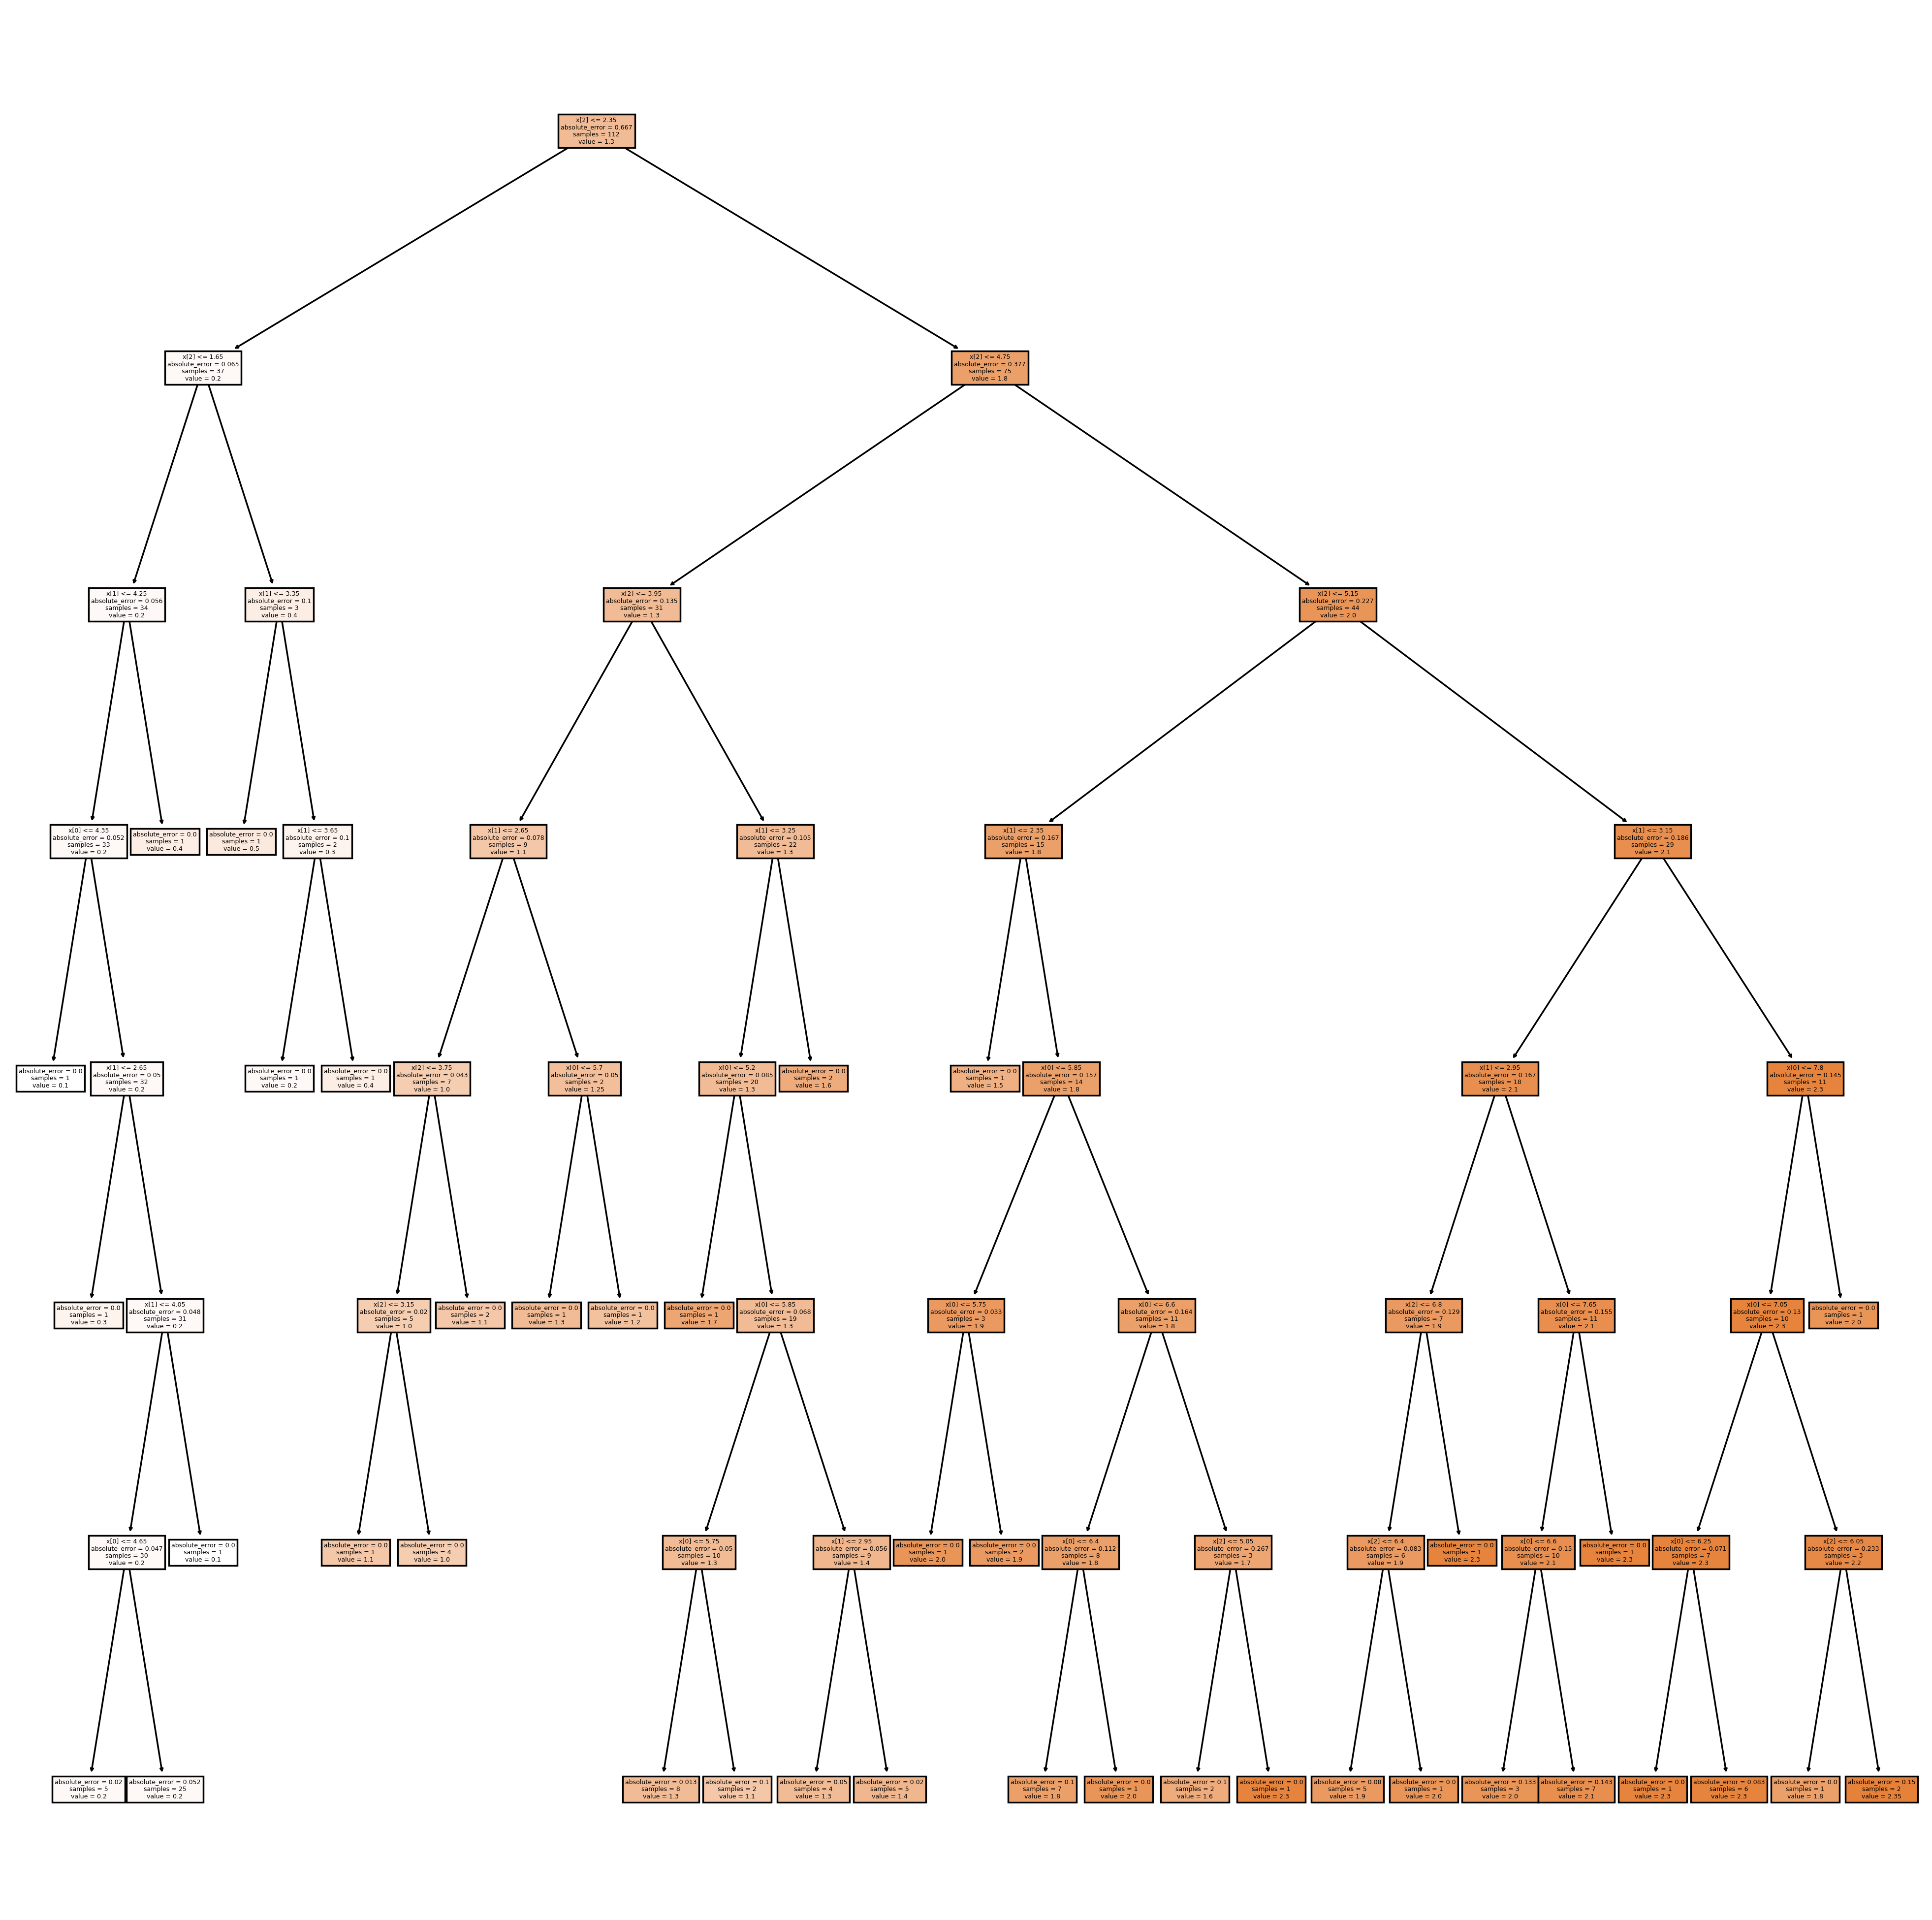

In [46]:
tree.plot_tree(dt, filled=True)
plt.show()

# Thank You!